# Analysing the deviations

Here we create some plots to see the data over all instead of only one instance.
We always compare to the minimal value.
Do not use it to compare the quality of the grids but only to see how bad a randomly
placed grid is.

In [8]:
from bisect import bisect

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [9]:
from _utils import convert_to_percentage_interval

from pcpptc import PolygonInstance, Solution
from pcpptc.plot import setup_plot, plot_polygon_instance, plot_solution
from pcpptc.plot.polgyon_instance import plot_coverage

In [10]:
data = pd.read_json("./01c_data.json")

In [11]:
# consider only random grids
data = data[data["solver"].apply(lambda x: "Random" in x)]

In [12]:
data.sort_values(by=["area", "Grid"], inplace=True)

In [13]:
data_area_interval = convert_to_percentage_interval(
    data[
        [
            "area",
            "relative_length",
            "relative_turn_sum",
            "relative_cost",
            "relative_coverage",
            "turn_factor",
            "Grid",
        ]
    ],
    on_column="area",
    percentage=5,
    round_=round,
)

## First important plot: Average cost for random grid over size.

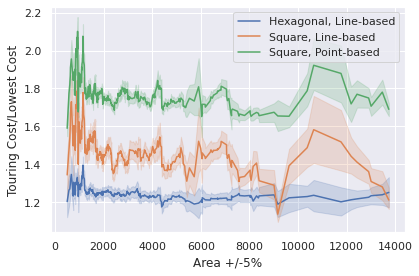

In [14]:
sns.lineplot(data=data_area_interval, x="area", y="relative_cost", hue="Grid")
plt.legend(loc="upper right")
plt.ylabel("Touring Cost/Lowest Cost")
plt.xlabel("Area +/-5%")
plt.tight_layout()
plt.savefig("./output/03_touring_cost_area.pdf")
plt.show()

## Second important plot: Average cost for random grid over turn factor.

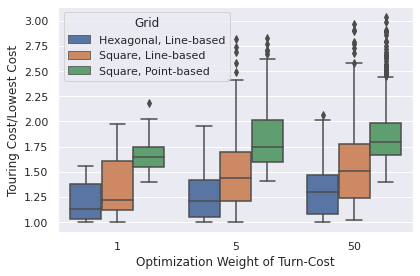

In [15]:
sns.boxplot(data=data, x="turn_factor", y="relative_cost", hue="Grid")
plt.ylabel("Touring Cost/Lowest Cost")
plt.xlabel("Optimization Weight of Turn-Cost")
plt.tight_layout()
plt.savefig("./output/03_touring_cost_turn_factor.pdf")
plt.show()

# The following plots are rather unimportant

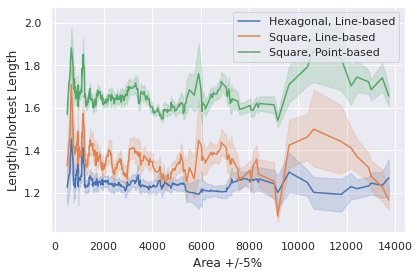

In [16]:
sns.lineplot(data=data_area_interval, x="area", y="relative_length", hue="Grid")
plt.legend(loc="upper right")
plt.ylabel("Length/Shortest Length")
plt.xlabel("Area +/-5%")
plt.tight_layout()

This plot shows that hexagonal, line-based grids result in the shortest tours.
square, line-based follow very close.
Using line-based grids saves 20-80% of length.

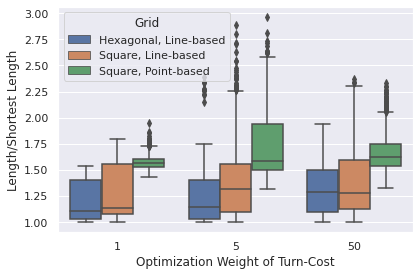

In [17]:
plt.show()
sns.boxplot(data=data, x="turn_factor", y="relative_length", hue="Grid")
plt.ylabel("Length/Shortest Length")
plt.xlabel("Optimization Weight of Turn-Cost")
plt.tight_layout()
plt.show()

## Checking the covered area
Actually better to use from the best grid in the next notebook.

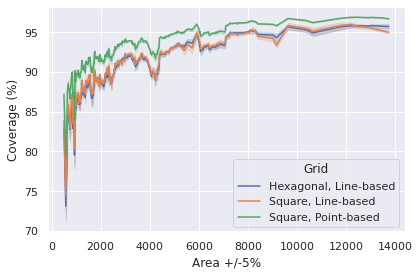

In [18]:
sns.lineplot(data=data_area_interval, x="area", y="relative_coverage", hue="Grid")
plt.ylabel("Coverage (%)")
plt.xlabel("Area +/-5%")
plt.tight_layout()
plt.savefig("./output/03_coverage_area.pdf")

The covered area depends on the size of the polygon.
This is to be expected, as the primary part of uncovered area is at the boundary.
The larger the polygon, the smaller is the expected boundary area.

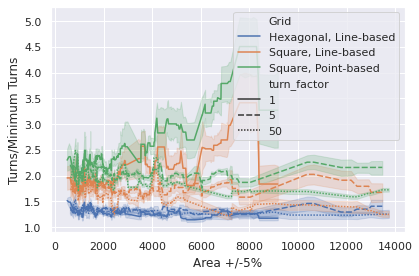

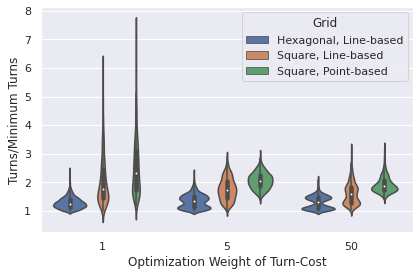

In [19]:
sns.lineplot(
    data=data_area_interval,
    x="area",
    y="relative_turn_sum",
    hue="Grid",
    style="turn_factor",
)
plt.legend(loc="upper right")
plt.ylabel("Turns/Minimum Turns")
plt.xlabel("Area +/-5%")
plt.tight_layout()
plt.show()
sns.violinplot(data=data, x="turn_factor", y="relative_turn_sum", hue="Grid")
plt.ylabel("Turns/Minimum Turns")
plt.xlabel("Optimization Weight of Turn-Cost")
plt.tight_layout()
plt.show()

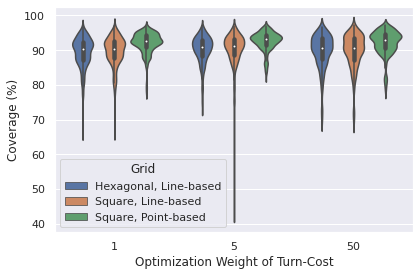

In [20]:
plt.show()
sns.violinplot(data=data, x="turn_factor", y="relative_coverage", hue="Grid")
plt.ylabel("Coverage (%)")
plt.xlabel("Optimization Weight of Turn-Cost")
plt.tight_layout()
plt.savefig("./output/03_coverage_turn_factor.pdf")
plt.show()